In [3]:
import sys
print(sys.executable)

c:\Users\benhu\UCL\Term 2\Data Science COMP0047\data-science-project\Scripts\python.exe


In [4]:
import pandas as pd
import numpy as np

In [5]:
wells = pd.read_csv('data/wells.csv')
# display(wells)

C:\Users\benhu\AppData\Local\Temp\ipykernel_28068\39602960.py:1: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  wells = pd.read_csv('data/wells.csv')


In [6]:
# Loaded variable 'wells_df' from URI: c:\Users\benhu\UCL\Term 2\Data Science COMP0047\data-science-project\data\Wells.csv
# import pandas as pd
wells_df = pd.read_csv(r'data\Wells.csv');

# Remove leading and trailing whitespace in columns: 'well_name', 'well_number' and 12 other columns
wells_df['well_name'] = wells_df['well_name'].str.strip()
wells_df['well_number'] = wells_df['well_number'].str.strip()
wells_df['spud_date'] = wells_df['spud_date'].str.strip()
wells_df['country'] = wells_df['country'].str.strip()
wells_df['province_state'] = wells_df['province_state'].str.strip()
wells_df['county'] = wells_df['county'].str.strip()
wells_df['original_operator'] = wells_df['original_operator'].str.strip()
wells_df['current_operator'] = wells_df['current_operator'].str.strip()
wells_df['basin_name'] = wells_df['basin_name'].str.strip()
wells_df['current_status'] = wells_df['current_status'].str.strip()
wells_df['hole_direction'] = wells_df['hole_direction'].str.strip()
wells_df['td_tvd_uom'] = wells_df['td_tvd_uom'].str.strip()
wells_df['final_td_uom'] = wells_df['final_td_uom'].str.strip()
wells_df['datum'] = wells_df['datum'].str.strip()

# Drop duplicate rows across all columns
wells_df = wells_df.drop_duplicates()

# Drop rows with missing data in columns: 'country', 'county'
wells_df = wells_df.dropna(subset=['country'])

# Change column type to string for column: 'uwi'
wells_df = wells_df.astype({'uwi': 'string'})

C:\Users\benhu\AppData\Local\Temp\ipykernel_28068\3527333388.py:3: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  wells_df = pd.read_csv(r'data\Wells.csv');


In [7]:

wells_report_df = pd.read_csv('data/adhoc_reports__wells_drilled_by_operator_with_depth.csv')
wells_report_df

,date,country,state,operator,tvd,lat,lon
0,07/07/1922 07:00,Canada,Alberta,Coutts-Sweetgrass Oils Ltd,869.30,49.000037,-111.878653
1,13/12/2003 07:00,Canada,Alberta,KRANG ENERGY INC.,822.56,49.001977,-112.145171
2,13/12/2003 07:00,Canada,Alberta,KRANG ENERGY INC.,822.56,49.001977,-112.145171
3,21/01/1984 07:00,Canada,Manitoba,Enerplus ECT Resources Ltd,962.00,49.001628,-100.827432
4,04/08/1984 06:00,Canada,Manitoba,Omega Hydrocarbons Ltd,953.00,49.090072,-100.827436
...,...,...,...,...,...,...,...
1048570,19/10/1978 06:00,Russia,Rostov,Unknown,NaN,48.589893,41.107312
1048571,26/04/1980 07:00,Russia,Rostov,Unknown,NaN,48.602393,41.093978
1048572,04/07/1981 06:00,Russia,Rostov,Unknown,NaN,48.638243,42.307051
1048573,04/07/1981 06:00,Russia,Rostov,Unknown,NaN,48.657967,42.306772


In [8]:
import folium

# Create a map centered at a specific latitude and longitude

wells_report_df_subset = wells_report_df.head(1000).copy()

m = folium.Map(location=[wells_report_df_subset.loc[:,'lat'].mean(), wells_report_df_subset.loc[:,'lon'].mean()], zoom_start=10)


for i in range(len(wells_report_df_subset)):
    folium.Marker([wells_report_df_subset.loc[i, 'lat'], wells_report_df_subset.loc[i, 'lon']]).add_to(m)

# m.save('map.html')
m

In [9]:
russia = wells_report_df[wells_report_df['country'] == 'Russia'].copy().reset_index(drop=True)
russia = russia.dropna(subset=['lat', 'lon']).reset_index(drop=True)
russia.shape

(57840, 7)

In [16]:
# Create a map centered at a specific latitude and longitude
m2 = folium.Map(location=[russia.loc[:, 'lat'].mean(), russia.loc[:, 'lon'].mean()], zoom_start=3)

# Add a marker at the same location
# folium.Marker([51.5074, -0.1278], popup='London').add_to(m)



for i in range(1000):
    folium.Marker([russia.loc[i, 'lat'], russia.loc[i, 'lon']]).add_to(m2)

# Save the map to an HTML file
m2

In [17]:
countries = wells_report_df['country'].unique()
north_american_countries = [
    "Canada",
    "United States",
    "Mexico",
    "Belize",
    "Costa Rica",
    "El Salvador",
    "Guatemala",
    "Honduras",
    "Nicaragua",
    "Panama"
]

north_american_wells = wells_report_df[wells_report_df['country'].isin(north_american_countries)].copy().reset_index(drop=True)
north_american_wells
north_american_wells_small = north_american_wells.sample(500).reset_index(drop=True)

In [18]:
# Plotting long and lats for a sample of the north american wells
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

,date,country,state,operator,tvd,lat,lon,geometry
0,08/07/2007 06:00,Canada,Alberta,Encana Corp,712.70,49.266330,-111.045876,POINT (-111.04588 49.26633)
1,29/10/2016 06:00,Canada,Alberta,Nuvista Energy Ltd,3134.88,54.641697,-118.833694,POINT (-118.83369 54.6417)
2,26/01/1995 07:00,Canada,Alberta,Chevron Canada Ltd,1699.00,55.241337,-114.535994,POINT (-114.53599 55.24134)
3,30/11/1958 07:00,Canada,Saskatchewan,Chauvco Oil & Gas Canada Ltd,1198.78,49.903532,-102.480241,POINT (-102.48024 49.90353)
4,NaN,Canada,Alberta,TAQA North Ltd,NaN,52.523907,-114.863613,POINT (-114.86361 52.52391)
...,...,...,...,...,...,...,...,...
495,09/02/2011 07:00,Canada,Alberta,Baytex Energy Ltd,602.60,56.281107,-116.767158,POINT (-116.76716 56.28111)
496,07/12/2014 07:00,Canada,Alberta,Delphi Energy Corp,2635.89,54.194996,-117.369920,POINT (-117.36992 54.195)
497,23/10/1985 06:00,Canada,Alberta,ENERMARK INC.,674.20,52.809037,-110.548978,POINT (-110.54898 52.80904)
498,13/01/1996 07:00,Canada,Alberta,Encana Corp,358.50,55.870935,-111.100441,POINT (-111.10044 55.87094)


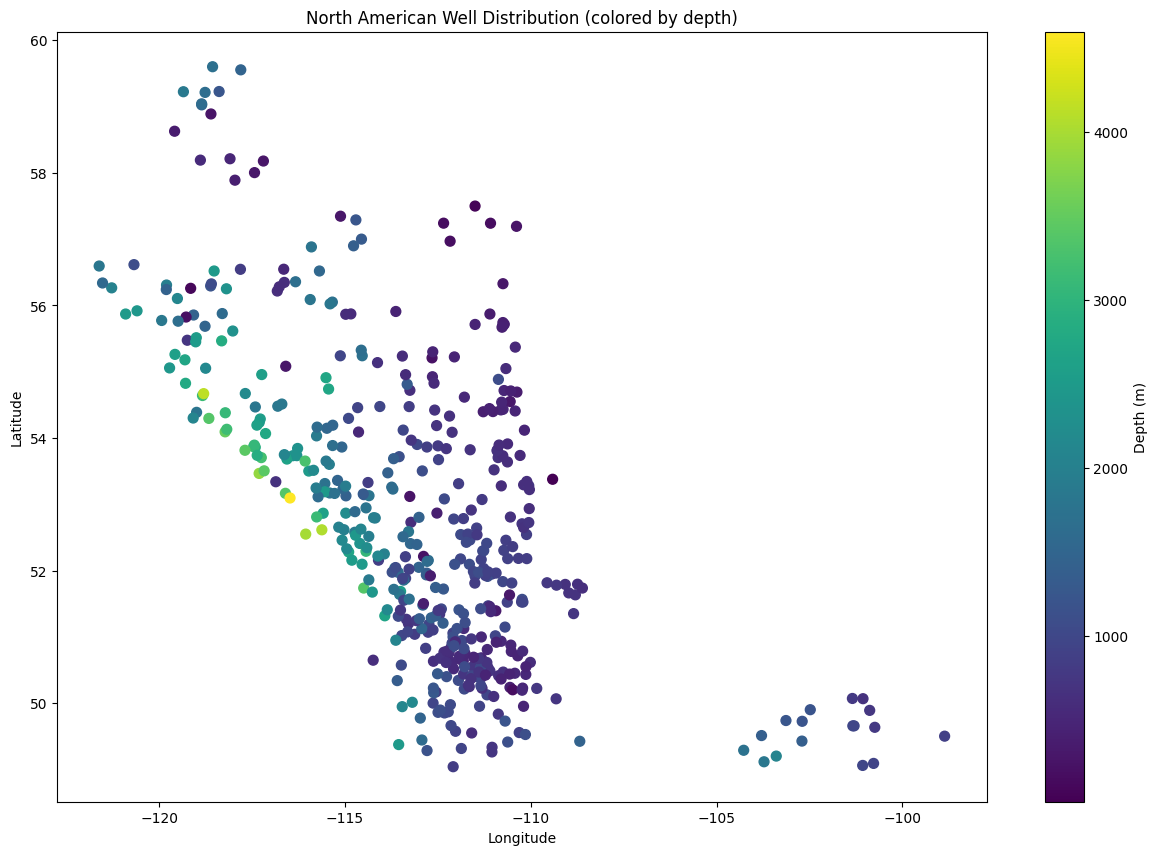

In [32]:
# Convert your DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(
    north_american_wells_small,
    geometry=gpd.points_from_xy(
        north_american_wells_small.lon,
        north_american_wells_small.lat
        )
    )

display(gdf)
# Create the plot

# Create the 3D scatter plot
fig = go.Figure()

# Add scatter points
fig.add_trace(go.Scatter3d(
    x=gdf.geometry.x,
    y=gdf.geometry.y,
    z=gdf.tvd,
    mode='markers',
    marker=dict(
        size=1,
        color=gdf.tvd,
        colorscale='viridis',
        colorbar=dict(title='Depth (m)')
    ),
    name='Wells'
))

# Add vertical lines
for x, y, z in zip(gdf.geometry.x, gdf.geometry.y, gdf.tvd):
    fig.add_trace(go.Scatter3d(
        x=[x, x],
        y=[y, y],
        z=[0, z],
        mode='lines',
        line=dict(color='blue', width=1),
        opacity=0.1,
        showlegend=False
    ))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Total Vertical Depth (m)',
        zaxis=dict(autorange='reversed')  # Invert z-axis
    ),
    title='Well Depths Distribution North America',
    height=800,  # Increase height to make plot taller
)
fig.show()

# Create a 2D scatter plot
plt.figure(figsize=(15, 10))


# Plot the points
scatter = plt.scatter(
    gdf.geometry.x,
    gdf.geometry.y,
    c=gdf.tvd,  # Color by depth
    cmap='viridis',
    s=50  # Point size
)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('North American Well Distribution (colored by depth)')
plt.colorbar(scatter, label='Depth (m)')

plt.show()


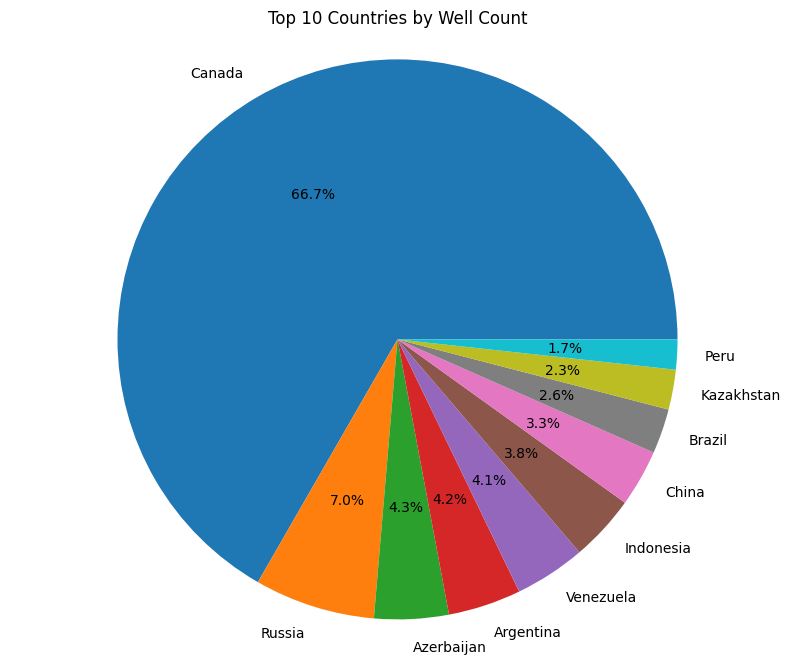

In [31]:
count_by_country = wells_report_df['country'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(count_by_country.head(10), labels=count_by_country.head(10).index, autopct='%1.1f%%')
plt.title('Top 10 Countries by Well Count')
plt.axis('equal')
plt.show()

In [43]:
import plotly.graph_objects as go

# Filter out rows where we have both surface and bottom hole coordinates
valid_wells = wells_df.dropna(subset=['surface_latitude', 'surface_longitude', 
                                    'bottom_hole_latitude', 'bottom_hole_longitude', 
                                    'final_td']).head(1000)

# Create a 3D scatter plot
fig = go.Figure()

# Add surface points
fig.add_trace(go.Scatter3d(
    x=valid_wells['surface_longitude'],
    y=valid_wells['surface_latitude'],
    z=np.zeros(len(valid_wells)),  # Surface points at z=0
    mode='markers',
    name='Surface Location',
    marker=dict(size=1, color='blue')
))

# Add bottom hole points
fig.add_trace(go.Scatter3d(
    x=valid_wells['bottom_hole_longitude'],
    y=valid_wells['bottom_hole_latitude'],
    z=valid_wells['final_td'],
    mode='markers',
    name='Bottom Hole Location',
    marker=dict(size=1, color='red')
))

# Add 3D lines connecting surface to bottom hole
for _, well in valid_wells.iterrows():
    fig.add_trace(go.Scatter3d(
        x=[well['surface_longitude'], well['bottom_hole_longitude']],
        y=[well['surface_latitude'], well['bottom_hole_latitude']],
        z=[0, well['final_td']],  # From surface (0) to final depth
        mode='lines',
        line=dict(
            # Color based on depth
            colorscale='Magma',    # Other options include: 'Plasma', 'Inferno', 'Magma', 'Cividis', 'Rainbow', 'RdBu', 'Blues', 'Hot'
            width=1
        ),
        showlegend=False
    ))

# Update layout
fig.update_layout(
    title='3D Well Trajectories',
    scene=dict(
        xaxis_title='Longitude',
        yaxis_title='Latitude',
        zaxis_title='Depth (m)',
        zaxis=dict(
            autorange='reversed'  # Reverse z-axis to show depth going down
        )
    ),
    scene_camera=dict(
        up=dict(x=0, y=0, z=1),
        center=dict(x=0, y=0, z=0),
        eye=dict(x=1.5, y=1.5, z=1.5)
    ),
    showlegend=True,
    template='plotly_white',
    height=1000,  # Increase height to make plot taller
)

fig.show()

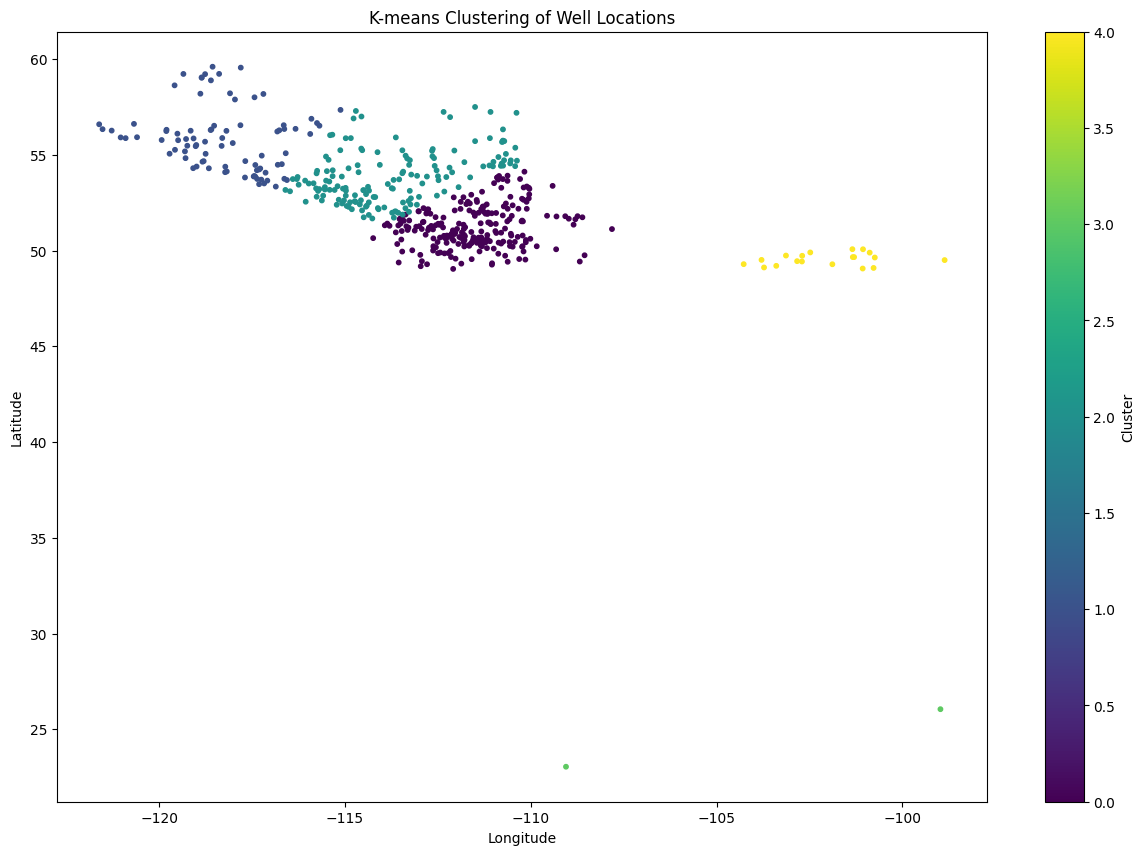


Cluster Centers:
       lat       lon
0  51.2238 -111.5436
1  55.8177 -118.2489
2  53.8698 -113.7144
3  24.5525 -104.0156
4  49.5432 -102.0159


In [47]:
from sklearn.cluster import KMeans
import numpy as np

# Extract lat and lon into a numpy array for clustering
coords = gdf[['lat', 'lon']].values

# Try with 5 clusters - you can adjust this number
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
gdf['cluster'] = kmeans.fit_predict(coords)

# Create a plot showing the clusters
plt.figure(figsize=(15, 10))
scatter = plt.scatter(
    gdf['lon'],      # x-coordinates (longitude)
    gdf['lat'],      # y-coordinates (latitude)
    c=gdf['cluster'], # color points by cluster assignment (0-4)
    cmap='viridis',  # color scheme to use
    s=10            # size of scatter points
)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering of Well Locations')
plt.show()

# Print cluster centers
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_, 
    columns=['lat', 'lon']
).round(4)
print("\nCluster Centers:")
print(cluster_centers) 